In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<Axes: >

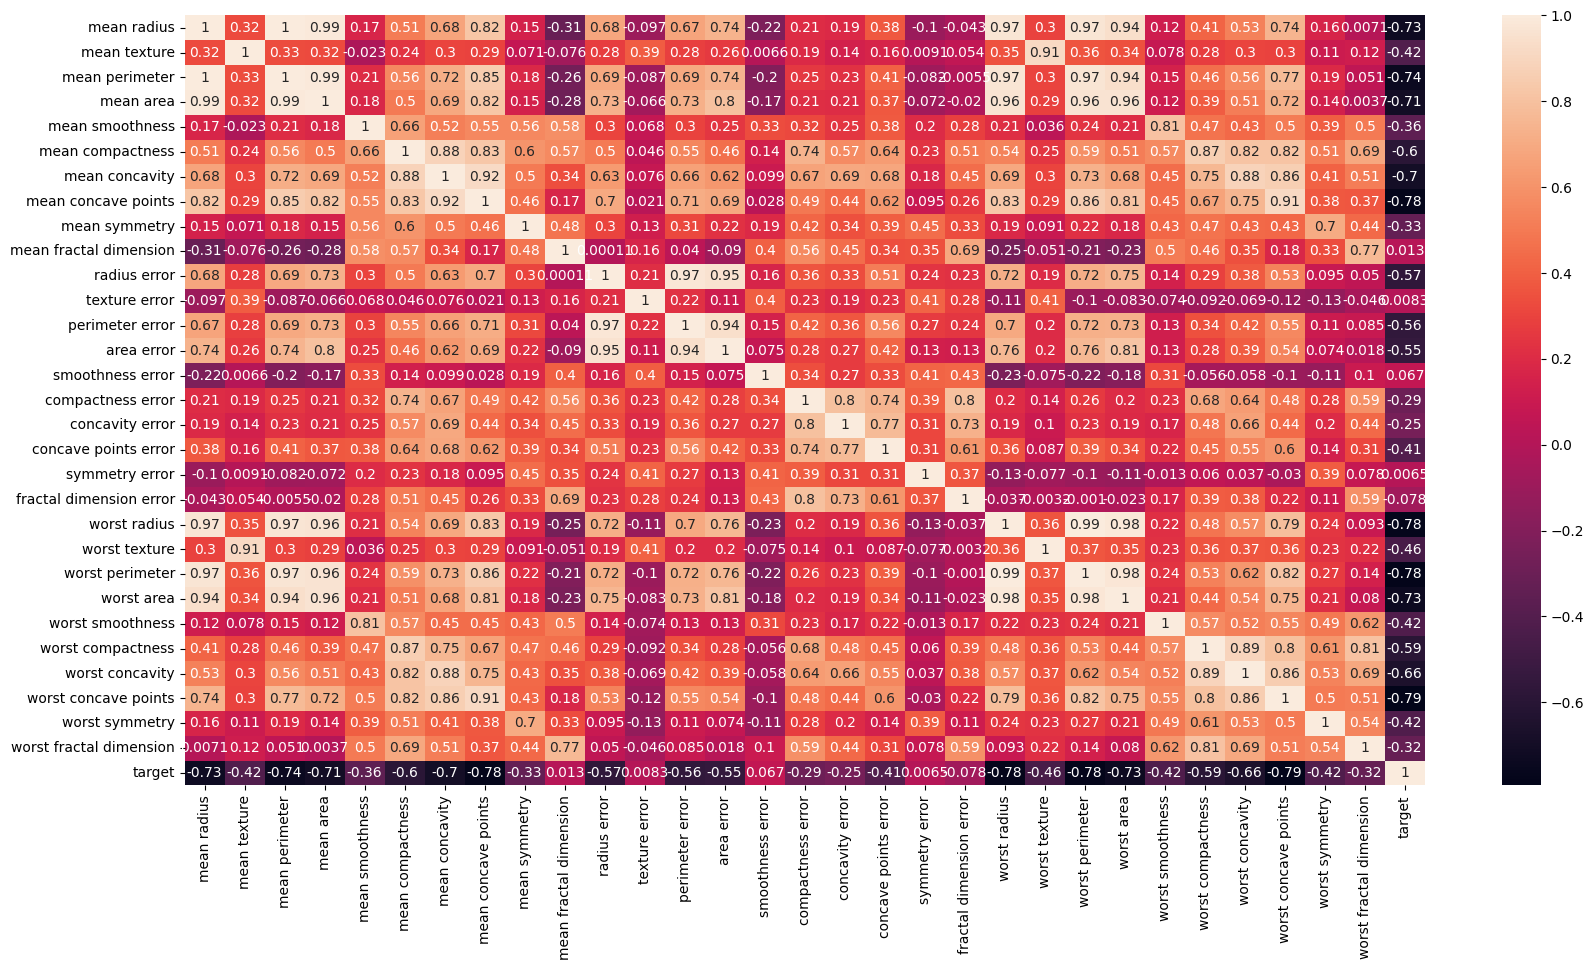

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(cancer.corr(),annot=True)

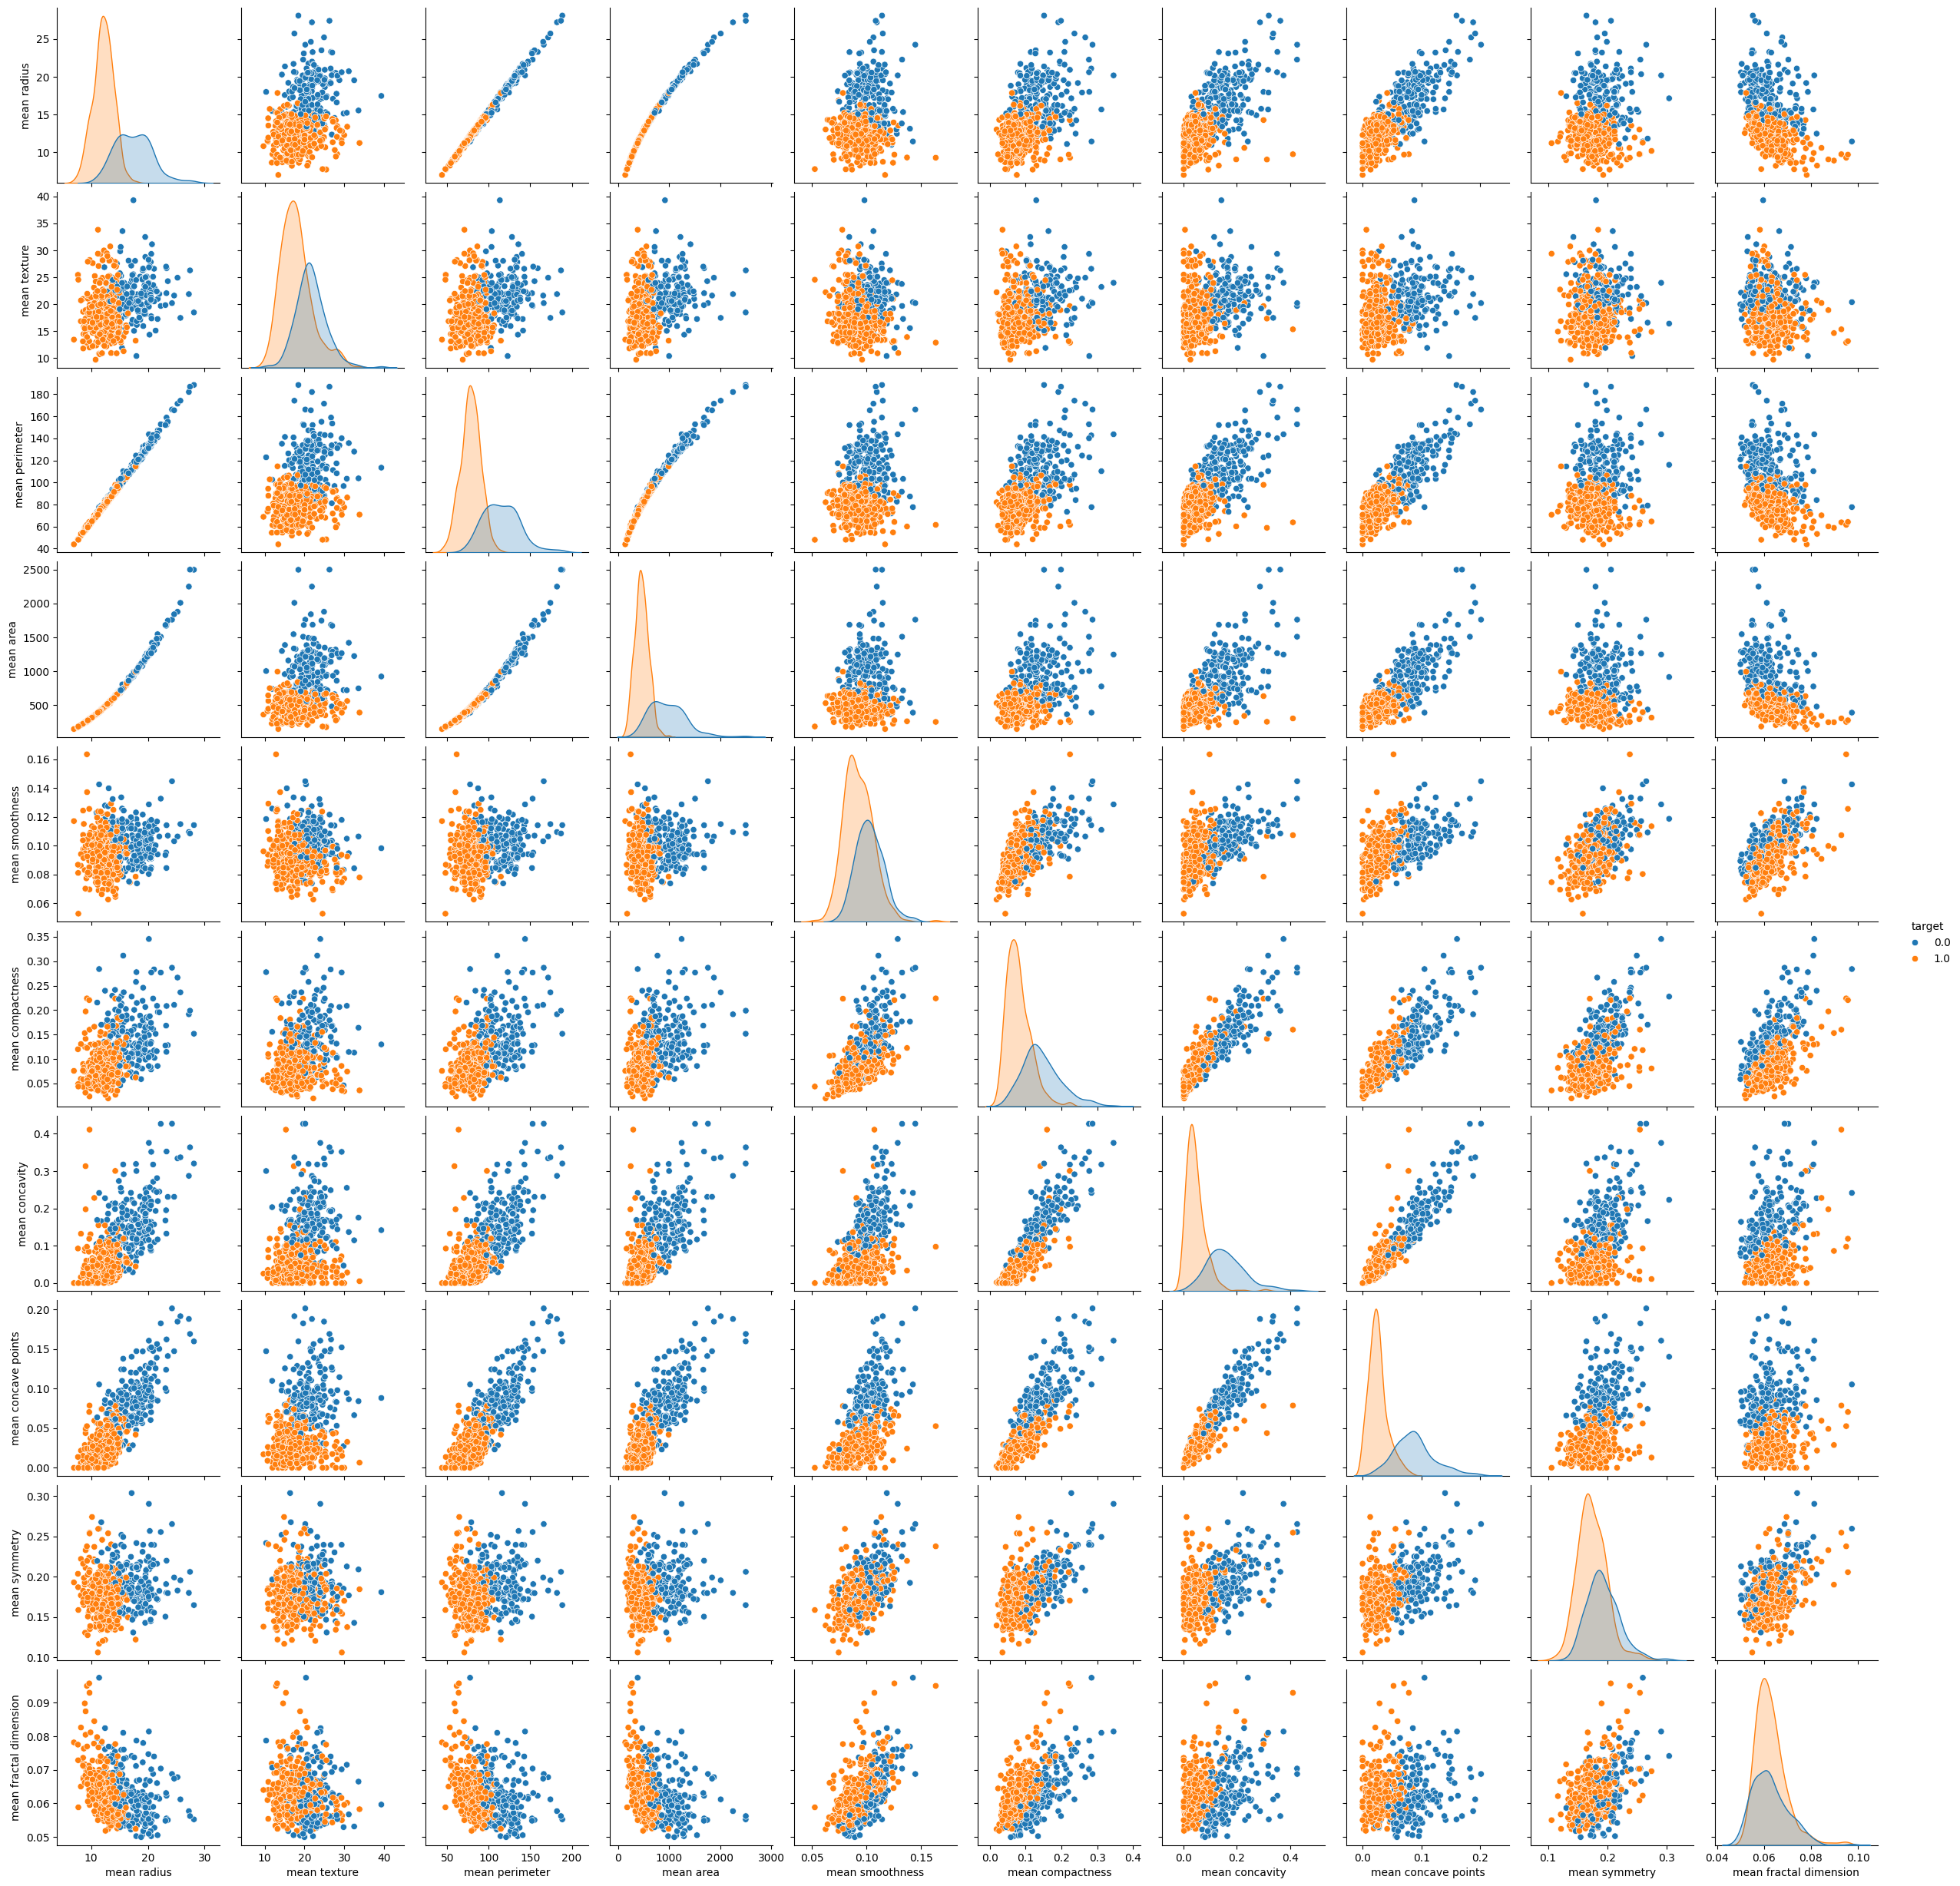

In [5]:
sns.pairplot(cancer,hue='target',vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension',])

**What is a Support Vector Machine (SVM)?**
A Support Vector Machine (SVM) is a binary linear classification whose decision boundary is explicitly constructed to minimize generalization error. It is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection.

In [6]:
X=cancer.drop('target',axis=1)
y=cancer['target']


**Create the training and testing data**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

Import Support Vector Machine (SVM) Model

In [8]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)



SVC()

In [9]:
y_predict = svc_model.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
cm=np.array(confusion_matrix(y_test,y_predict,labels=[1,0]))
confusion=pd.DataFrame(cm,index=['is_cancer','is_healthy'],columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,8,40


Let’s visualize our confusion matrix on a Heatmap

<Axes: >

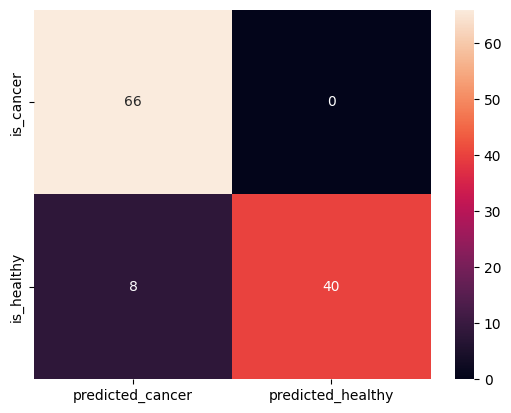

In [11]:
sns.heatmap(confusion,annot=True,fmt='d')

In [12]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        48
         1.0       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



48 healthy patients have cancer. We only achieved 34% accuracy!

**Improving our Model**


*   Data normalization
*   X’ = (X-X_min) / (X_max — X_min)


**Normalize data**

In [13]:
X_train_min=X_train.min()
X_train_max=X_train.max()
X_train_range=X_train_max-X_train_min

In [16]:
X_test_min=X_test.min()
X_test_range=(X_test-X_test_min).max()
X_test_scaled=(X_test-X_test_min)/X_test_range

In [18]:
svc_model = SVC()
svc_model.fit(X_test_scaled,y_test)

SVC()

In [19]:
y_predict = svc_model.predict(X_test_scaled)

In [20]:
cm=np.array(confusion_matrix(y_test,y_predict,labels=[1,0]))
confusion=pd.DataFrame(cm,index=['is_cancer','is_healthy'],columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,1,47


In [21]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# **Sources**

1.   http://scikit-learn.org/stable/modules/svm.html
2.   http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf'
3. http://pyml.sourceforge.net/doc/howto.pdf
https://www.bcrf.org/breast-cancer-statistics
4. https://www.cancer.org/cancer/breast-cancer/about/
5. https://medium.com/
